In [3]:
import pickle
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_file = "preproc_data_w_text.p"
df = pickle.load(open(data_file,'rb'))

In [5]:
!cd ../../../Shared/CMV && ls

cmv_20161111.jsonlist deltas_info.p
comment_info.p        post_info.p


In [6]:
df.head()

,comment_id,comment_content,comment_auth,comment_time,comment_parent,comment_depth,op_id,op_content,op_auth,op_time,delta,delta_thread,time_diff,comment_harm_virtue,op_harm_virtue,comment_harm_virtue_bin,op_harm_virtue_bin,comment_MFT_usage,comment_harm_vice,op_harm_vice,comment_harm_vice_bin,op_harm_vice_bin,comment_fairness_virtue,op_fairness_virtue,comment_fairness_virtue_bin,op_fairness_virtue_bin,comment_fairness_vice,op_fairness_vice,comment_fairness_vice_bin,op_fairness_vice_bin,comment_ingroup_virtue,op_ingroup_virtue,comment_ingroup_virtue_bin,op_ingroup_virtue_bin,comment_ingroup_vice,op_ingroup_vice,comment_ingroup_vice_bin,op_ingroup_vice_bin,comment_authority_virtue,op_authority_virtue,comment_authority_virtue_bin,op_authority_virtue_bin,comment_authority_vice,op_authority_vice,comment_authority_vice_bin,op_authority_vice_bin,comment_purity_virtue,op_purity_virtue,comment_purity_virtue_bin,op_purity_virtue_bin,comment_purity_vice,op_purity_vice,comment_purity_vice_bin,op_purity_vice_bin,comment_morality_general,op_morality_general,comment_morality_general_bin,op_morality_general_bin,comment_MFT_usage_bin,j_num,j_den,jaccard_sim_split,jaccard_sim_same
0,d9ujmbi,I would offer this very sub as a counterpoint ...,Ansuz07,1.478827e+09,5c8xdc,1,5c8xdc,I have to say that I am very disappointed with...,ralpher313,1.478826e+09,0,1,442.0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,5,7,0.833333,0.714286
1,d9ujw71,That doesn't mean that you can't have a meanin...,Ansuz07,1.478827e+09,d9ujt0e,3,5c8xdc,I have to say that I am very disappointed with...,ralpher313,1.478826e+09,1,1,758.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,9,0.571429,0.333333
2,d9ukuqd,Practice a hobby when you are sick of politics...,Krieg-The-Psycho1,1.478828e+09,d9uk2bm,5,5c8xdc,I have to say that I am very disappointed with...,ralpher313,1.478826e+09,0,1,1845.0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,3,9,0.571429,0.333333
3,d9uk6m0,This election has certianly been very polarizi...,Ansuz07,1.478827e+09,d9uk2bm,5,5c8xdc,I have to say that I am very disappointed with...,ralpher313,1.478826e+09,0,1,1087.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,9,0.571429,0.333333
4,d9ukl5h,People have always done this - men would get t...,Ansuz07,1.478828e+09,d9ukg11,7,5c8xdc,I have to say that I am very disappointed with...,ralpher313,1.478826e+09,0,1,1544.0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,4,8,0.692308,0.500000


In [7]:
df = df[df['delta_thread'] == 1]

In [8]:
df.columns

Index(['comment_id', 'comment_content', 'comment_auth', 'comment_time',
       'comment_parent', 'comment_depth', 'op_id', 'op_content', 'op_auth',
       'op_time', 'delta', 'delta_thread', 'time_diff', 'comment_harm_virtue',
       'op_harm_virtue', 'comment_harm_virtue_bin', 'op_harm_virtue_bin',
       'comment_MFT_usage', 'comment_harm_vice', 'op_harm_vice',
       'comment_harm_vice_bin', 'op_harm_vice_bin', 'comment_fairness_virtue',
       'op_fairness_virtue', 'comment_fairness_virtue_bin',
       'op_fairness_virtue_bin', 'comment_fairness_vice', 'op_fairness_vice',
       'comment_fairness_vice_bin', 'op_fairness_vice_bin',
       'comment_ingroup_virtue', 'op_ingroup_virtue',
       'comment_ingroup_virtue_bin', 'op_ingroup_virtue_bin',
       'comment_ingroup_vice', 'op_ingroup_vice', 'comment_ingroup_vice_bin',
       'op_ingroup_vice_bin', 'comment_authority_virtue',
       'op_authority_virtue', 'comment_authority_virtue_bin',
       'op_authority_virtue_bin', 'comment_

In [9]:
df.shape

(484140, 63)

First, look at % moral words by comment length.

In [10]:
comments = df['comment_content']
lengths = [len(x.split()) for x in comments]

In [11]:
df['comment_length'] = lengths

To count the tokens in the dict that occur in the comments and to avoid double-counting we need to:

    (1) stem and lowercase both dictionary and target.
    (2) transform target into list
    (3) count the number of matching tokens

In [76]:
morality_dict = pickle.load(open('morals_dict.p', 'rb'))

In [75]:
#del morality_dict['morality_general']

In [77]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from collections import defaultdict

In [83]:
def count_moral_words(morality_dict, text):
    text = text.lower().split()
    text = [stemmer.stem(x) for x in text]
    unique_words = defaultdict(int) # counts if a word already used as there are some duplicates
    moral_count = 0
    for k,v in morality_dict.items():
        for w in v:
            unique_words[w] += 0
            wc = text.count(w)
            if unique_words[w] > 0:
                pass
            else:
                unique_words[w] = wc
                moral_count+=wc
    return moral_count

In [86]:
# Test
count_moral_words({'a':['sin'],'b':['sin']}, "This is an immoral sinful sentence full of hate and judgment")

1

In [ ]:
#df['num_morality_tokens'] = df[commenter_morality_cols].sum(axis=1)
df['num_morality_tokens'] = [count_moral_words(morality_dict, x) for x in comments]

In [ ]:
pickle.dump(df, open('model_df.p', 'wb'))

In [91]:
df['prop_moral'] = df['num_morality_tokens']/df['comment_length']

In [92]:
df['prop_moral'] = df['prop_moral'].fillna(0) #Fill nans with zeros

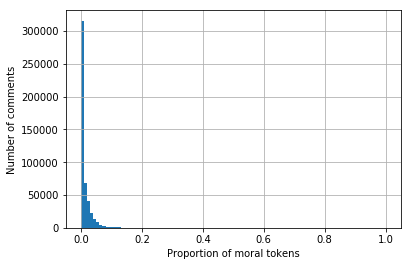

In [162]:
ax = df['prop_moral'].hist(bins=100)
ax.set_xlabel('Proportion of moral tokens')
ax.set_ylabel('Number of comments')

In [ ]:
moral = df[df['num_morality_tokens'] >= 1]
not_moral = df[df['num_morality_tokens'] == 0]
has_delta = df[df['delta'] == 1]
not_delta = df[df['delta'] == 0]

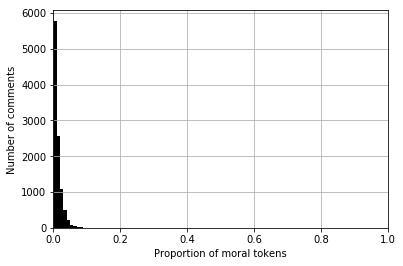

In [163]:
plot=has_delta.prop_moral.hist(bins=50,color='black')
plot.set_xlim(0,1)
plot.set_xlabel('Proportion of moral tokens')
plot.set_ylabel('Number of comments')

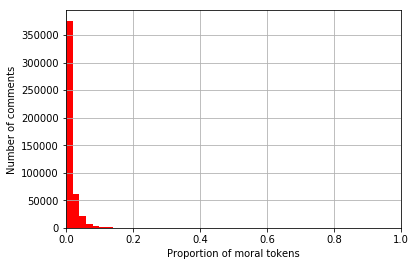

In [164]:
plot = not_delta.prop_moral.hist(bins=50,color='red')
plot.set_xlim(0,1)
plot.set_xlabel('Proportion of moral tokens')
plot.set_ylabel('Number of comments')

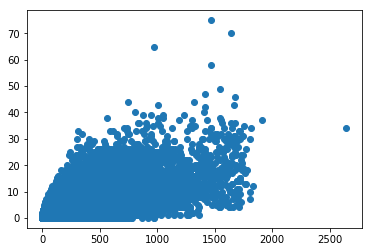

In [94]:
plt.scatter(x=df['comment_length'],y=df['num_morality_tokens'])

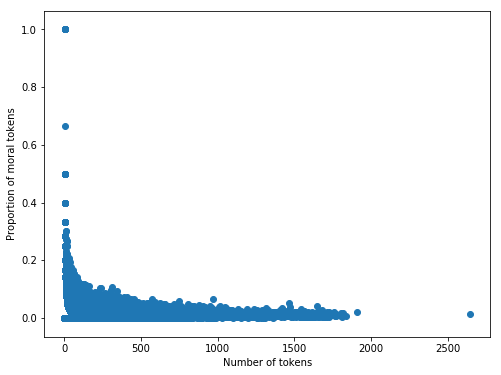

In [178]:
p = plt.scatter(x=df['comment_length'], y=df['prop_moral'])
p.axes.set_xlabel('Number of tokens')
p.axes.set_ylabel('Proportion of moral tokens')
p.figure.set_size_inches(8,6)

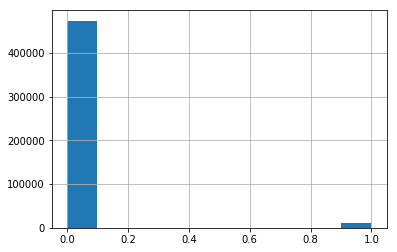

In [120]:
df.delta.hist()

In [150]:
dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate

In [37]:
#TODO: Graph % moral terms by delta.
#TODO: SHow mean delta for moral and not moral

In [29]:
#TODO: Current graph y axis > 1.0 because morality words not countded at the token level...

In [97]:
moral.shape

(213662, 66)

In [98]:
not_moral.shape

(270478, 66)

In [99]:
from scipy.stats import ttest_ind

In [100]:
ttest_ind(moral['delta'], not_moral['delta'])

Ttest_indResult(statistic=51.16003048419855, pvalue=0.0)

In [101]:
moral['delta'].mean()

0.033314300156321669

In [102]:
not_moral['delta'].mean()

0.01195291299107506

These results show large differences in deltas based on whether or not a comment contained a moral word. Moral comments were much more likely to achieve deltas.

Now to assess whether the similarity between OP and comment is associated with deltas.

In [117]:
ttest_ind(has_delta['jaccard_sim_same'], not_delta['jaccard_sim_same'])

Ttest_indResult(statistic=42.367037909036071, pvalue=0.0)

In [118]:
has_delta['jaccard_sim_same'].mean()

0.43750788869134932

In [119]:
not_delta['jaccard_sim_same'].mean()

0.34361236880987212

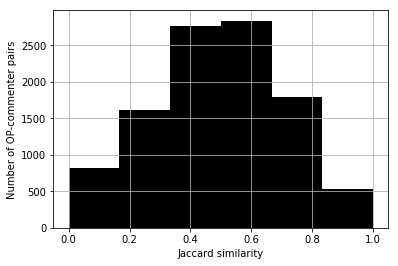

In [189]:
p = has_delta['jaccard_sim_same'].hist(bins=6, color='black')
p.set_xlabel('Jaccard similarity')
p.set_ylabel('Number of OP-commenter pairs')

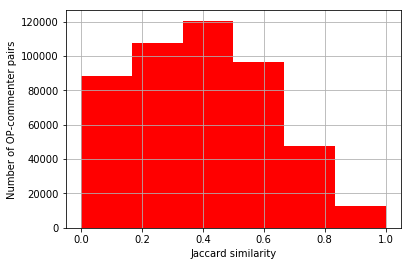

In [190]:
p = not_delta['jaccard_sim_same'].hist(bins=6, color='red')
p.set_xlabel('Jaccard similarity')
p.set_ylabel('Number of OP-commenter pairs')

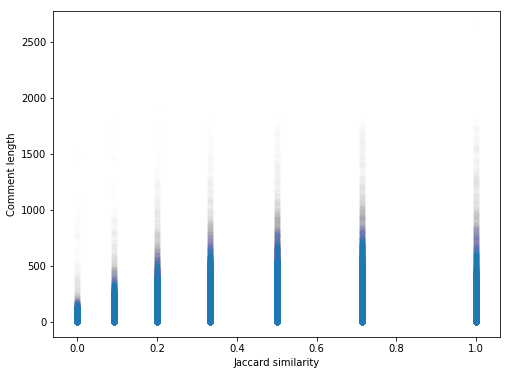

In [196]:
p = plt.scatter(x=df['jaccard_sim_same'], y=df['comment_length'],alpha=0.003)
p.axes.set_ylabel('Comment length')
p.axes.set_xlabel('Jaccard similarity')
p.figure.set_size_inches(8,6)